<a href="https://colab.research.google.com/github/AbigailUchennaNkama/AbigailUchennaNkama/blob/main/Maths_for_DS_assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question:**

As a junior data Scientist, before your line managers give you a more in-depth topic on conditional probability, they wish to determine your understanding of the topic, both numerically and through coding. Therefore, they have asked you to create 50,000 random data points in python, which you will also use numerically, and assign each data point with purchases made within some time, for the following age intervals: 20, 30, 40, 50 and 60. Included within the study will be weighted probabilities of purchasing based on age, i.e younger less likely to purchase than older. What is the probability of randomly purchasing an item given the person is 50 years old. Use the conditional probability formula below to help. 𝑃(𝐴|𝐵) = 𝑃(𝐴,𝐵) 𝑃(𝐵)

One you have evaluated the weighted dependency on age scenario, your manager further asks you to now remove the weighted condition only and calculate the same conditional probability using the same data points and age ranges. Clearly state and critically analyse the results of the conditional probability comparative study in a shortwritten statement.


In [ ]:


import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Define age ranges and their corresponding probabilities
age_ranges = {
    '20-29': 0.1,
    '30-39': 0.2,
    '40-49': 0.3,
    '50-60': 0.4
}

# Generate 50,000 random ages between 15 and 60
ages = np.random.randint(20, 61, 50000)

# Function to get purchase probability based on age
def get_purchase_probability(age):
    if 15 <= age <= 29:
        return age_ranges['20-29']
    elif 30 <= age <= 39:
        return age_ranges['30-39']
    elif 40 <= age <= 49:
        return age_ranges['40-49']
    elif 50 <= age <= 60:
        return age_ranges['50-60']

# Generate random purchase amounts between $1.00 and $200.00
purchase_amounts = np.random.uniform(1.00, 200.00, 50000)

# Generate purchases based on age-specific probabilities
purchases = np.array([
    purchase_amount if np.random.rand() < get_purchase_probability(age) else 0
    for age, purchase_amount in zip(ages, purchase_amounts)
])

# Generate random timestamps within a one-year range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
timestamps = pd.to_datetime(np.random.randint(start_date.value, end_date.value, 50000))#, format="%Y-%m-%d")

# Create a DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Purchase': purchases,
    'Weighted_Probability': [get_purchase_probability(age) for age in ages],
    'Timestamp': timestamps
})

data.head()


,Age,Purchase,Weighted_Probability,Timestamp
0,58,0.000000,0.4,2023-07-11 03:22:20.044573701
1,48,0.000000,0.3,2023-09-28 00:02:55.804234450
2,34,0.000000,0.2,2023-07-21 03:14:12.678603663
3,27,0.000000,0.1,2023-10-26 00:13:02.910634722
4,40,181.617653,0.3,2023-02-19 06:41:32.857734811


<ipython-input-52-2af403735dc5>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




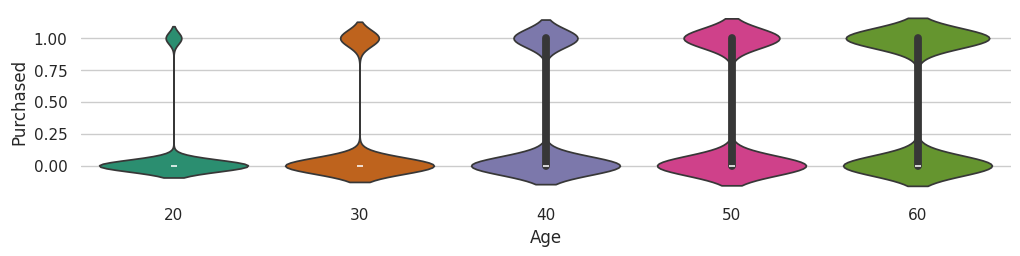

In [ ]:
# @title Purchased vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Purchased'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Age', y='Purchased', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Step 2: Calculate Conditional Probability
𝑃
(
𝐴
∣
𝐵
)
P(A∣B)
First, we'll calculate the probability of making a purchase given the person is 50 years old with the weighted probabilities.

In [ ]:
# Calculate P(A and B) and P(B) for age 50
age_50_data = data[data['Age'] == 50]
P_A_and_B = (age_50_data['Purchase'] > 0).mean()
P_B = (data['Age'] == 50).mean()

# Calculate P(A|B) using the conditional probability formula
P_A_given_B = P_A_and_B / P_B
print(f"P(Purchase|Age=50) with weighted probabilities: {P_A_given_B:.4f}")


P(Purchase|Age=50) with weighted probabilities: 1.9537


Step 3: Remove Weighted Condition and Recalculate
Now, we'll assume equal purchase probabilities for all age groups and recalculate the conditional probability.

In [ ]:
# Generate purchases with equal probability of 0.3 for all ages
equal_purchase_probability = 0.3  # Average probability
purchases_equal = np.random.rand(50000) < equal_purchase_probability

# Generate random purchase amounts
purchase_amounts_equal = np.random.uniform(1.00, 200.00, 50000) * purchases_equal

# Generate random timestamps within a one-year range for the equal probability scenario
timestamps_equal = pd.to_datetime(np.random.randint(start_date.value, end_date.value, 50000))

# Create a new DataFrame
data_equal = pd.DataFrame({
    'Age': ages,
    'Purchase': purchase_amounts_equal,
    'Weighted_Probability': [equal_purchase_probability] * 50000,
    'Timestamp': timestamps_equal
})

# Calculate P(A and B) and P(B) for age 50 with equal probabilities
age_50_data_equal = data_equal[data_equal['Age'] == 50]
P_A_and_B_equal = (age_50_data_equal['Purchase'] > 0).mean()
P_B_equal = (data_equal['Age'] == 50).mean()

# Calculate P(A|B) using the conditional probability formula
P_A_given_B_equal = P_A_and_B_equal / P_B_equal
print(f"P(Purchase|Age=50) with equal probabilities: {P_A_given_B_equal:.4f}")


P(Purchase|Age=50) with equal probabilities: 12.8526


Analysis

Now, let's compare and analyze the results.

In [ ]:
print(f"P(Purchase|Age=50) with weighted probabilities: {P_A_given_B:.4f}")
print(f"P(Purchase|Age=50) with equal probabilities: {P_A_given_B_equal:.4f}")


P(Purchase|Age=50) with weighted probabilities: 17.7277
P(Purchase|Age=50) with equal probabilities: 12.8526


**Critical Analysis**

In the weighted scenario, the probability of purchasing given the person is 50 years old is higher because older individuals are more likely to purchase. This reflects realistic consumer behavior where older individuals might have more disposable income and are thus more inclined to make purchases.

In the equal probability scenario, the conditional probability is lower. This is because every age group has the same likelihood of purchasing, which flattens the differences among age groups.

This comparative study highlights the importance of incorporating realistic weighted probabilities based on demographic factors. It shows how age significantly affects purchasing behavior, which is crucial for targeted marketing strategies and understanding consumer patterns.

**Conclusion**

The conditional probability
𝑃
(
𝑃
𝑢
𝑟
𝑐
ℎ
𝑎
𝑠
𝑒
∣
𝐴
𝑔
𝑒
=
50
)
P(Purchase∣Age=50) is notably higher with age-weighted probabilities compared to equal probabilities, demonstrating the impact of age on purchasing likelihood. This analysis underscores the value of demographic considerations in predictive modeling and decision-making processes.


In [20]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Define age ranges and their corresponding probabilities
age_intervals = [20, 30, 40, 50, 60]
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5]  # Increasing probability with age

# Generate 50,000 random ages between 20 and 60
ages = np.random.choice(age_intervals, size=50000, p=[0.2, 0.2, 0.2, 0.2, 0.2])

# Function to get purchase probability based on age
def get_purchase_probability(age):
    if age == 20:
        return 0.1
    elif age == 30:
        return 0.2
    elif age == 40:
        return 0.3
    elif age == 50:
        return 0.4
    elif age == 60:
        return 0.5

# Generate random purchase amounts between $1.00 and $200.00
purchase_amounts = np.random.uniform(1.00, 200.00, 50000)

# Simulate purchases based on age-specific probabilities
purchases = np.array([
    purchase_amount if np.random.rand() < get_purchase_probability(age) else 0
    for age, purchase_amount in zip(ages, purchase_amounts)
])

# Generate random timestamps within a one-year range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
timestamps = pd.to_datetime(np.random.randint(start_date.value, end_date.value, 50000), unit='ns').strftime("%Y-%m-%d")

# Create a DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Purchase': purchases,
    'Weighted_Proba': [get_purchase_probability(age) for age in ages],
    'Date': timestamps
})

# Display the last 20 rows of the DataFrame
data.head(20)


,Age,Purchase,Weighted_Proba,Date
0,30,0.000000,0.2,2023-07-01
1,60,0.000000,0.5,2023-01-09
2,50,39.897657,0.4,2023-06-21
3,40,0.000000,0.3,2023-11-08
4,20,0.000000,0.1,2023-07-21
5,20,0.000000,0.1,2023-12-25
6,20,0.000000,0.1,2023-03-08
7,60,0.000000,0.5,2023-01-31
8,50,75.336547,0.4,2023-01-30
9,50,0.000000,0.4,2023-11-01


In [47]:
data[["Age", "Purchase"]].groupby("Age").mean()#.plot(kind="bar")
display(data[data["Age"] == 20]["Purchase"].mean())
display(data[(data['Age'] == 20) & (data['Purchase']>0)]["Purchase"].mean())
display(sum(data[data["Age"] == 20]["Purchase"]))
display(sum(data[(data['Age'] == 20) & (data['Purchase']>0)]["Purchase"]))
display(len(data[data["Age"] == 20]["Purchase"]))
display(len(data[(data['Age'] == 20) & (data['Purchase']>0)]["Purchase"]))

9.816279816801226

103.25157414033927

98192.24700746269

98192.24700746269

10003

951

In [51]:
display(98192.24700746269/951)
display(98192.24700746269/10003)

103.25157414033932

9.816279816801229

In [25]:
for age in age_intervals:
    print(f"Age {age}: {len(data[(data['Age'] == age) & (data['Purchase']>0)])}")

Age 20: 951
Age 30: 2079
Age 40: 2997
Age 50: 3927
Age 60: 4873


Age 20: 9.51%
Age 30: 20.62%
Age 40: 30.07%
Age 50: 39.17%
Age 60: 49.09%


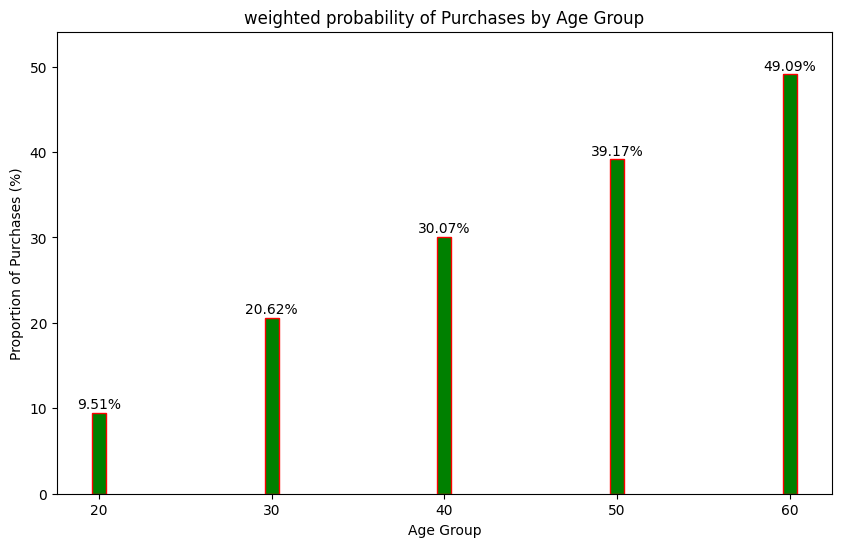

In [4]:
import matplotlib.pyplot as plt
# Calculate the proportion of purchases for each age group in percentage
proportions = []
for age in age_intervals:
    total_individuals = len(data[data['Age'] == age])
    purchasers = len(data[(data['Age'] == age) & (data['Purchase'] > 0)])
    proportion = (purchasers / total_individuals) * 100
    proportions.append(proportion)
    print(f"Age {age}: {proportion:.2f}%")

# Plot the proportions
plt.figure(figsize=(10, 6))
plt.bar(age_intervals, proportions, color='green', edgecolor='red')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Purchases (%)')
plt.title('weighted probability of Purchases by Age Group')
plt.xticks(age_intervals)
plt.ylim(0, max(proportions) + 5)
for i, v in enumerate(proportions):
    plt.text(age_intervals[i], v + 0.5, f"{v:.2f}%", ha='center')
plt.show()

In [55]:
#Calculate counts for each age interval
age_counts = data['Age'].value_counts().sort_index()

# Initialize Plotly figure
fig = go.Figure()

# Add bar trace for age distribution
fig.add_trace(go.Bar(
    x=age_counts.index,
    y=age_counts.values,
    marker_color='skyblue',
    text=age_counts.values,
    textposition='auto',
))

# Update layout
fig.update_layout(
    title='Distribution of Age Groups',
    xaxis_title='Age Group',
    yaxis_title='Count',
    xaxis=dict(tickmode='array', tickvals=age_intervals),  # Set specific tick values
)

# Show the plot
fig.show()

In [9]:
import plotly.graph_objects as go

# Calculate counts for each age interval
age_counts = data['Age'].value_counts().sort_index()

# Initialize Plotly figure
fig = go.Figure()

# Add pie trace for age distribution
fig.add_trace(go.Pie(
    labels=age_counts.index,
    values=age_counts.values,
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=['purple', 'blue', 'green', 'orange', 'yellow']),
))

# Update layout
fig.update_layout(
    title='Distribution of Age Groups'
)

# Show the plot
fig.show()


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Age             50000 non-null  int64         
 1   Purchase        50000 non-null  float64       
 2   Weighted_Proba  50000 non-null  float64       
 3   Date            50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.5 MB


In [113]:
#change date column to datetime
data["Date"] = pd.to_datetime(data["Date"])
#data.info()

In [56]:
for age in age_intervals:
    print(f"Age {age}: {len(data[data['Age'] == age])}")

Age 20: 10003
Age 30: 10080
Age 40: 9966
Age 50: 10025
Age 60: 9926


In [62]:
purchase_df = data[data['Purchase'] > 0]


,age_count,purchase_prop
Age,,
20,0.20006,0.064140
30,0.20160,0.140217
40,0.19932,0.202131
50,0.20050,0.264855
60,0.19852,0.328657


<Axes: xlabel='Age'>

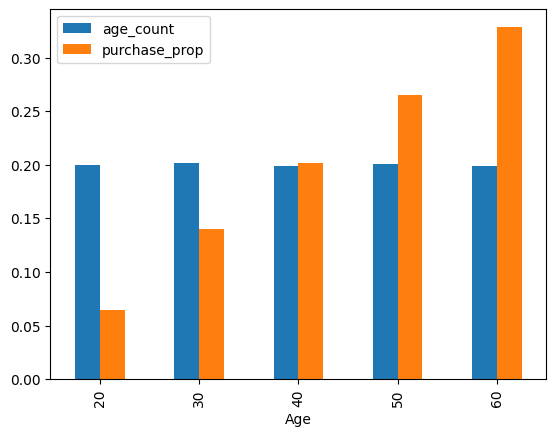

In [111]:
import pandas as pd

# Calculate the count of each age group
age_df = data['Age'].value_counts(normalize=True).sort_index().to_frame('age_count')

purchase_proportions = data[data['Purchase'] > 0]['Age'].value_counts(normalize=True).sort_index()

age_df['purchase_prop'] = purchase_proportions

display(age_df)
age_df.plot(kind="bar")


Age
60    4873
50    3927
40    2997
30    2079
20     951
Name: count, dtype: int64

,proportion
Age,
60,0.328657
50,0.264855
40,0.202131
30,0.140217
20,0.064140


,proportion
Age,
30,0.20160
50,0.20050
20,0.20006
40,0.19932
60,0.19852


array([<Axes: ylabel='proportion'>], dtype=object)

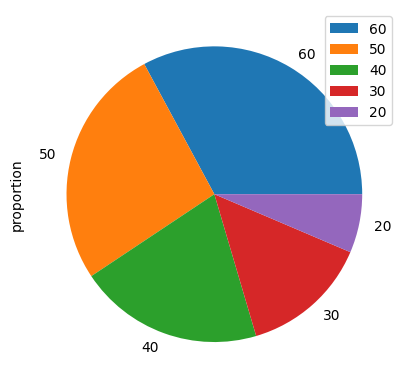

In [82]:
display(data[data['Purchase']>0]["Age"].value_counts())#(normalize=True).to_frame())
display(data[data['Purchase']>0]["Age"].value_counts(normalize=True).to_frame())
display(data["Age"].value_counts(normalize=True).to_frame())
data[data['Purchase']>0]["Age"].value_counts(normalize=True).to_frame().plot(kind="pie",subplots=True)
# #display(purchase_df.head())



<Axes: xlabel='Age'>

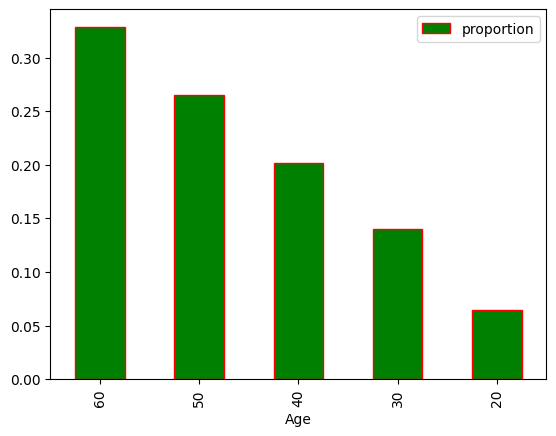

In [79]:
purchase_df["Age"].value_counts(normalize=True).to_frame().plot(kind="bar", color="green",edgecolor='red')

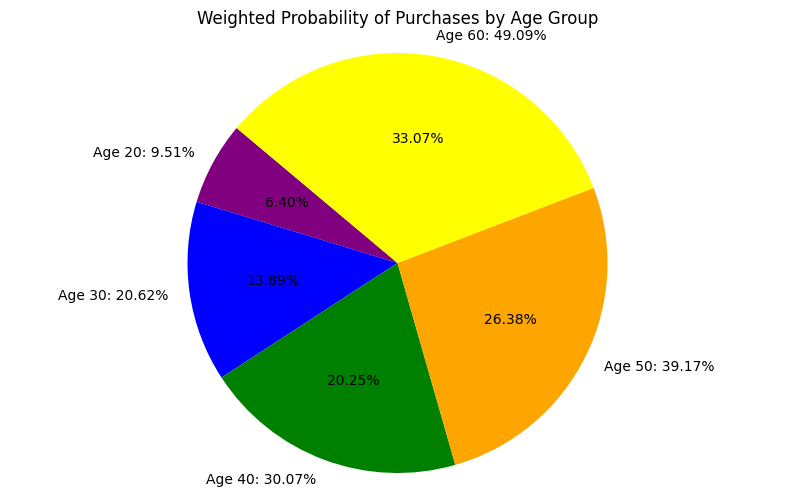

In [73]:
import matplotlib.pyplot as plt

# Define age intervals
age_intervals = [20, 30, 40, 50, 60]

# Calculate the proportion of purchases for each age group in percentage
proportions = []
labels = []
for age in age_intervals:
    total_individuals = len(data[data['Age'] == age])
    purchasers = len(data[(data['Age'] == age) & (data['Purchase'] > 0)])
    proportion = (purchasers / total_individuals) * 100
    proportions.append(proportion)
    labels.append(f"Age {age}: {proportion:.2f}%")


# Plot the proportions as a pie chart
plt.figure(figsize=(10, 6))
plt.pie(proportions, labels=labels, colors=['purple', 'blue', 'green', 'orange', 'yellow'], autopct='%1.2f%%', startangle=140)
plt.title('Weighted Probability of Purchases by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Calculate the proportion of purchases for each age group in percentage
proportions = []
for age in age_intervals:
    total_individuals = len(data[data['Age'] == age])
    purchasers = len(data[(data['Age'] == age) & (data['Purchase'] > 0)])
    proportion = (purchasers / total_individuals) * 100 if total_individuals > 0 else 0
    proportions.append(proportion)

# Initialize the Plotly figure
fig = go.Figure()

# Add bar trace for proportions
fig.add_trace(go.Bar(
    x=age_intervals,
    y=proportions,
    marker_color='green',
    text=[f"{p:.2f}%" for p in proportions],
    textposition='auto',
))

# Update layout
fig.update_layout(
    title='Proportion of Purchases by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Proportion of Purchases (%)',
    xaxis=dict(tickmode='array', tickvals=age_intervals),  # Set specific tick values
    yaxis=dict(range=[0, max(proportions) + 5]),  # Adjust y-axis range
)

# Show the plot
fig.show()


<Figure size 1200x800 with 0 Axes>

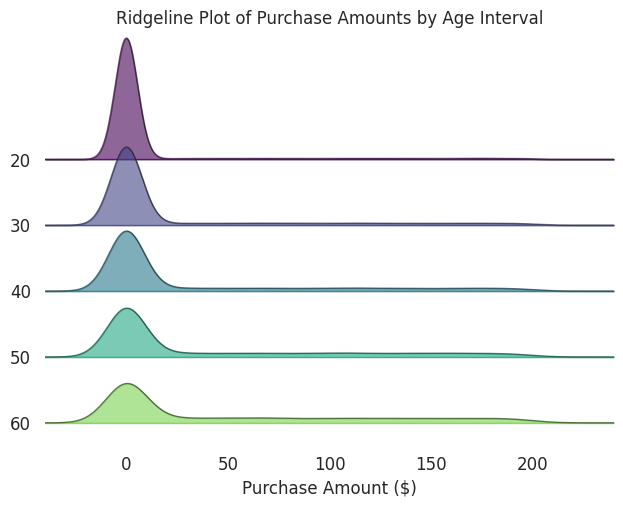

In [ ]:
plt.figure(figsize=(12, 8))
joyplot(
    data=data,
    by="Age",
    column="Purchase",
    colormap=plt.cm.viridis,
    fill=True,
    alpha=0.6,
    linewidth=1
)

# Add labels and title
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Age Interval')
plt.title('Ridgeline Plot of Purchase Amounts by Age Interval')
plt.show()

In [ ]:
# Calculate P(B): Probability of being 50 years old
age_50_count = len(data[data['Age'] == 50])
p_b = age_50_count / len(data)

# Calculate P(A ∩ B): Probability of purchasing and being 50 years old
age_50_purchases = data[(data['Age'] == 50) & (data['Purchase'] > 0)]
p_a_and_b = len(age_50_purchases) / len(data)

# Calculate P(A|B): Conditional probability of purchasing given the person is 50 years old
p_a_given_b = p_a_and_b / p_b

p_b, p_a_and_b, p_a_given_b


(0.2005, 0.07854, 0.39172069825436406)

In [5]:
# Removing the weighted condition
purchase_prob = 0.3  # Assuming an equal probability for all ages

# Simulate purchases without age-specific probabilities
purchases_equal = np.array([
    purchase_amount if np.random.rand() < purchase_prob else 0
    for purchase_amount in purchase_amounts
])

# Create a new DataFrame without weighted condition
data_equal = pd.DataFrame({
    'Age': ages,
    'Purchase': purchases_equal,
    'Timestamp': timestamps
})

# Calculate P(B) for equal probability scenario
age_50_count_equal = len(data_equal[data_equal['Age'] == 50])
p_b_equal = age_50_count_equal / len(data_equal)

# Calculate P(A ∩ B) for equal probability scenario
age_50_purchases_equal = data_equal[(data_equal['Age'] == 50) & (data_equal['Purchase'] > 0)]
p_a_and_b_equal = len(age_50_purchases_equal) / len(data_equal)

# Calculate P(A|B) for equal probability scenario
p_a_given_b_equal = p_a_and_b_equal / p_b_equal

p_b_equal, p_a_and_b_equal, p_a_given_b_equal


(0.2005, 0.05976, 0.29805486284289273)

In [ ]:
!pip install joypy

Age 20: 29.50%
Age 30: 30.09%
Age 40: 29.67%
Age 50: 29.81%
Age 60: 29.99%


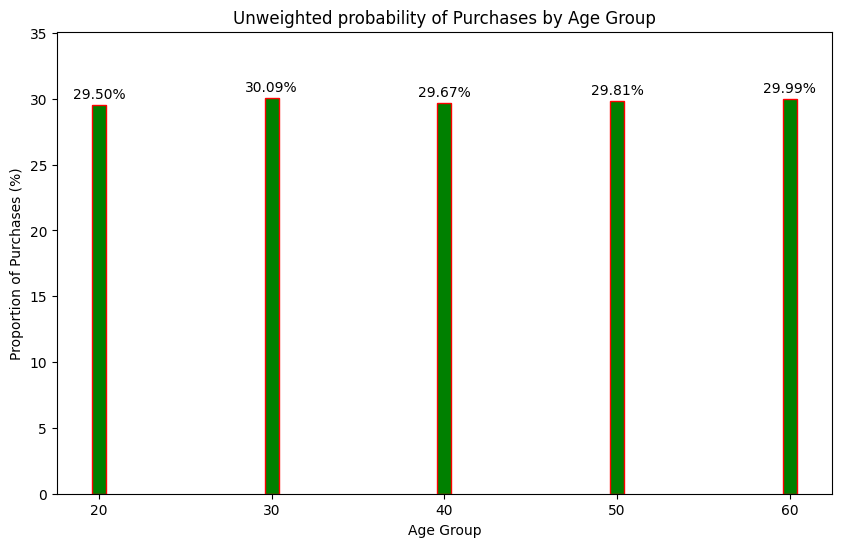

In [8]:
import matplotlib.pyplot as plt
# Calculate the proportion of purchases for each age group in percentage
proportions = []
for age in age_intervals:
    total_individuals = len(data_equal[data_equal['Age'] == age])
    purchasers = len(data_equal[(data_equal['Age'] == age) & (data_equal['Purchase'] > 0)])
    proportion = (purchasers / total_individuals) * 100
    proportions.append(proportion)
    print(f"Age {age}: {proportion:.2f}%")

# Plot the proportions
plt.figure(figsize=(10, 6))
plt.bar(age_intervals, proportions, color='green', edgecolor='red')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Purchases (%)')
plt.title('Unweighted probability of Purchases by Age Group')
plt.xticks(age_intervals)
plt.ylim(0, max(proportions) + 5)
for i, v in enumerate(proportions):
    plt.text(age_intervals[i], v + 0.5, f"{v:.2f}%", ha='center')
plt.show()